In [106]:
import numpy as np
import matplotlib.pyplot as plt

# 1- Regression avec SKLearn

In [109]:
np.random.seed(0)
m = 100
X = np.linspace(0,10,m).reshape(m,1)
y = X+np.random.randn(m,1)

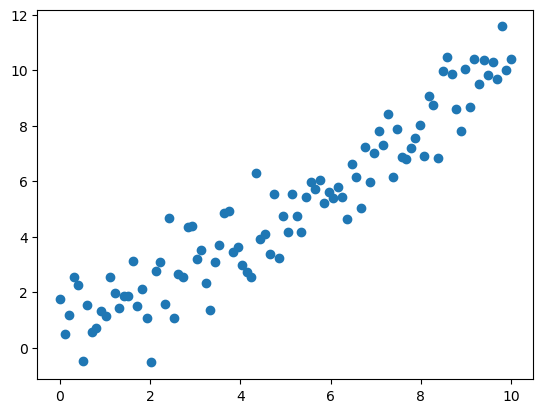

In [111]:
plt.scatter(X,y)

In [112]:
from sklearn.linear_model import LinearRegression

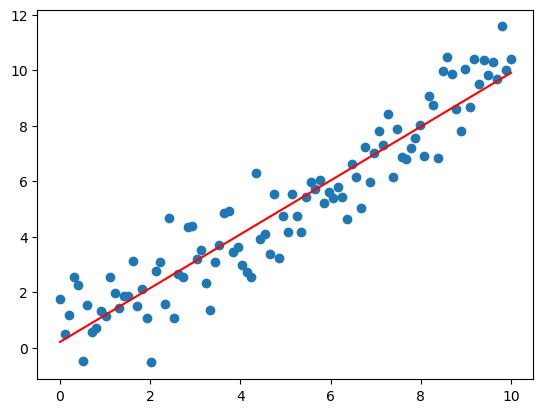

In [115]:
model = LinearRegression()
model.fit(X,y)
model.score(X,y)
predicctions =  model.predict(X)
plt.scatter(X,y)
plt.plot(X, predicctions, c='r')

In [117]:
from sklearn.svm import SVR

In [119]:
np.random.seed(0)
m = 100
X = np.linspace(0,10,m).reshape(m,1)
y = X**2+np.random.randn(m,1)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


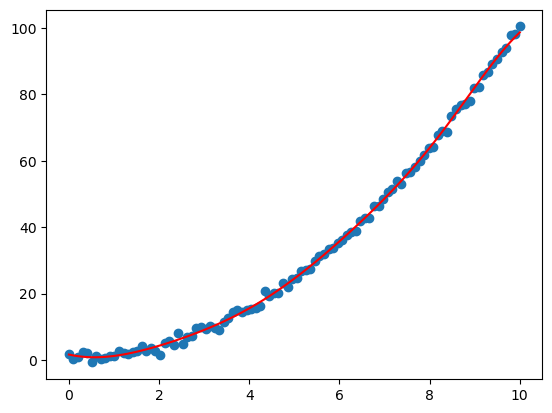

In [121]:
model = SVR(C=100)
model.fit(X,y)
model.score(X,y)
predicctions =  model.predict(X)
plt.scatter(X,y)
plt.plot(X, predicctions, c='r')

# 2- Classification : Survivants du Titanic

In [124]:
import pandas as pd
import seaborn as sns

In [126]:
titanic = pd.read_excel('titanic3.xls')
titanic.shape
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [155]:
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
# titanic['sex'].replace(['male','female'],[0,1], inplace=True)
titanic['sex'] = titanic['sex'].astype('category').cat.codes
titanic.head()

,survived,pclass,sex,age
0,1,1,0,29.0000
1,1,1,1,0.9167
2,0,1,0,2.0000
3,0,1,1,30.0000
4,0,1,0,25.0000


In [157]:
from sklearn.neighbors import KNeighborsClassifier  

In [159]:
model = KNeighborsClassifier(n_neighbors=3)

In [161]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)

In [163]:
model.fit(X,y)
model.score(X,y)

0.8451242829827916

(array([665.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 381.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

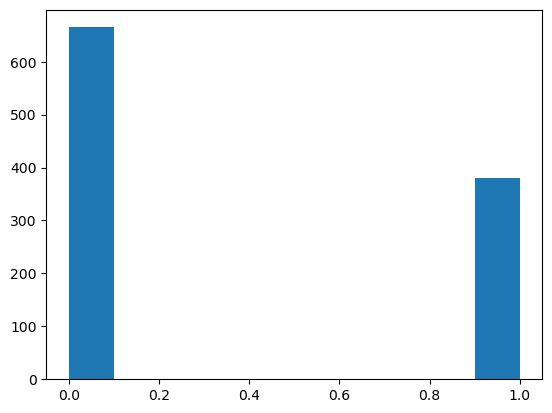

In [165]:
predict = model.predict(X)
plt.hist(predict)

In [167]:
def survie(model, pclass=3, sex=1, age=24):
    x = np.array([pclass, sex, age]).reshape(1,3)
    print(model.predict(x))
    print(model.predict_proba(x))

In [169]:
survie(model)

[0]
[[1. 0.]]


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


3


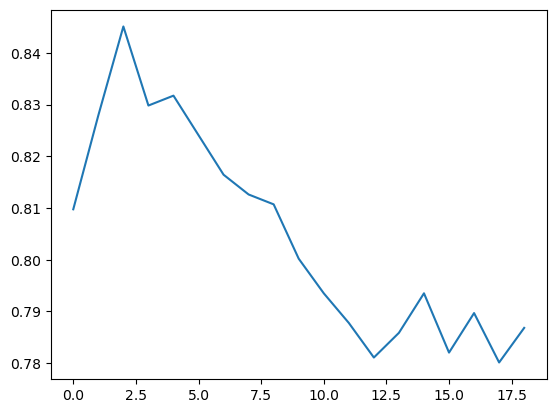

In [176]:
score = []
best_k = 1
best_score = 0
for k in range(1,20):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X,y)
    score.append(model.score(X,y))
    
    if best_score < model.score(X,y):
        best_k = k
        best_score = model.score(X,y)
print(best_k)
plt.plot(score)
    